In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,  mean_absolute_error, r2_score
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('../../../data/preprocessed/feature_selection_by_model_mock_data.csv')

In [3]:
df.head()

,near_Koh_Pich_in_km,near_Russian_Market_in_km,near_Boeng_Keng_Kang_1_in_km,n_cafe_5km,n_cafe_in_3km_to_5km,n_hospital_in_1km_to_2km,nearest_hotel,n_hotel_in_1km_to_2km,n_hotel_in_3km_to_5km,n_mart_in_3km_to_5km,...,address_line_2_Tumnob Tuek,address_line_2_Tuol Sangke,address_line_2_Tuol Svay Prey Ti Muoy,address_line_2_Tuol Svay Prey Ti Pir,address_line_2_Tuol Tumpung Ti Muoy,address_line_2_Tuol Tumpung Ti Pir,address_line_2_Veal Sbov,address_line_2_Veal Vong,address_line_2_Voat Phnum,price_per_m2
0,5,6,6,28,19,0,0,0,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,365.99
1,1,2,0,172,60,50,5,53,7,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6573.84
2,4,1,3,138,89,5,0,0,48,54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3170.62
3,7,4,5,79,57,1,0,0,9,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2138.94
4,4,1,2,160,96,5,0,1,77,53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2665.02


In [4]:
df.shape

(9973, 123)

In [5]:
X = df.drop('price_per_m2', axis=1)
y = df['price_per_m2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Based on your settings with slight wiggle for tuning
xgb_param_grid = {
    'max_depth': [4, 5, 6],
    'colsample_bytree': [0.8, 0.82, 0.85],
    'alpha': [0.2, 0.3, 0.4],
    'reg_lambda': [0.2, 0.21, 0.3],
    'learning_rate': [0.007, 0.009, 0.012],
    'n_estimators': [2500, 2700, 2900],
    'subsample': [0.95, 0.99],
    'min_child_weight': [10, 12, 15],
    'gamma': [0, 0.1, 0.3]
}

lgb_param_grid = {
    'max_depth': [8, 10, 12],
    'num_leaves': [16, 18, 20],
    'colsample_bytree': [0.7, 0.75, 0.8],
    'reg_alpha': [0.15, 0.19, 0.25],
    'reg_lambda': [0.2, 0.25, 0.3],
    'learning_rate': [0.0008, 0.001, 0.0015],
    'n_estimators': [2600, 2800, 3000],
    'subsample': [0.4, 0.44, 0.5],
    'min_child_samples': [3, 5, 7]
}

gbr_param_grid = {
    'max_depth': [4, 5, 6],
    'n_estimators': [2500, 2677, 2800],
    'learning_rate': [0.0008, 0.001, 0.002],
    'subsample': [0.9, 0.95, 1.0],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'max_features': [0.4, 0.45, 0.5],
    'alpha': [0.55, 0.58, 0.6],
    'loss': ['huber']  # Keep robust loss
}

In [7]:
# Tune XGBoost
xgb_base = XGBRegressor(objective='reg:squarederror', tree_method='hist', random_state=42)
xgb_search = RandomizedSearchCV(xgb_base, xgb_param_grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=3, random_state=42, n_jobs=-1)
xgb_search.fit(X_train, y_train)

# Tune LightGBM
lgb_base = LGBMRegressor(boosting_type='gbdt', objective='regression', verbosity=-1, random_state=42)
lgb_search = RandomizedSearchCV(lgb_base, lgb_param_grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=3, random_state=42, n_jobs=-1)
lgb_search.fit(X_train, y_train)

# Tune GradientBoosting
gbr_base = GradientBoostingRegressor(random_state=42)
gbr_search = RandomizedSearchCV(gbr_base, gbr_param_grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=3, random_state=42, n_jobs=-1)
gbr_search.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'alpha': [0.55, 0.58, 0.6],
                                        'learning_rate': [0.0008, 0.001, 0.002],
                                        'loss': ['huber'],
                                        'max_depth': [4, 5, 6],
                                        'max_features': [0.4, 0.45, 0.5],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [2500, 2677, 2800],
                                        'subsample': [0.9, 0.95, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [8]:
stacked_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_search.best_estimator_),
        ('lgb', lgb_search.best_estimator_),
        ('gbr', gbr_search.best_estimator_)
    ],
    final_estimator=Ridge(),
    passthrough=True,
    n_jobs=-1
)

stacked_model.fit(X_train, y_train)

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(alpha=0.3, base_score=None,
                                            booster=None, callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.82, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=0,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_...
                                             n_estimators=3000, num_leaves=18,
                                             objective='regression',
                                             random_state=42, reg_alpha=0.15,
                                             reg_lambda=0.2, subsample=0.44,
                                             verbosity=-1)),
                              ('gbr',
                               GradientBoostingRegressor(alpha=0.55,
                                                         learning_rate=0.001,
                                                         loss='huber',
                                                         max_depth=6,
                                                         max_features=0.4,
                                                         min_samples_leaf=2,
                                                         min_samples_split=4,
                                                         n_estimators=2677,
                                                         random_state=42))],
                  final_estimator=Ridge(), n_jobs=-1, passthrough=True)

In [9]:
y_pred = stacked_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Stacked Model RMSE: {rmse:.4f}")

Stacked Model RMSE: 202.3168


In [15]:
r2 = r2_score(y_test, y_pred)
# Evaluate on training set
y_train_pred = stacked_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"Train R² Score: {r2_train:.3f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test R² Score: {r2:.3f}")
print(f"Test RMSE: {rmse:.2f}")

Train R² Score: 0.988
Train RMSE: 166.66
Test R² Score: 0.982
Test RMSE: 202.32


In [16]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Stacked Model RMSE: {rmse:.4f}")
print(f"Stacked Model MAE: {mae:.4f}")
print(f"Stacked Model R2: {r2:.4f}")

Stacked Model RMSE: 202.3168
Stacked Model MAE: 107.9131
Stacked Model R2: 0.9824


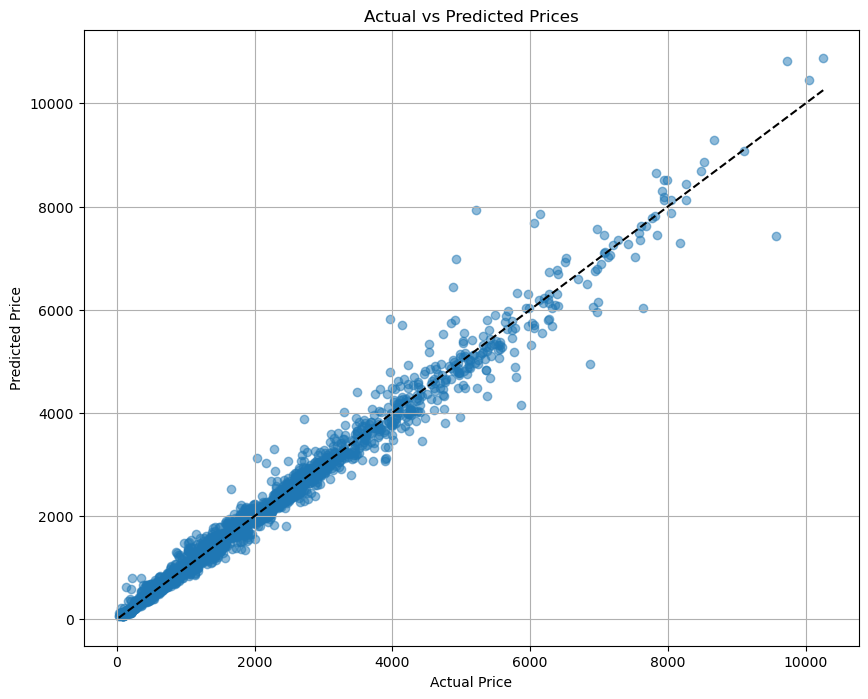

In [11]:
# Predict on test set
import matplotlib.pyplot as plt

y_test_actual = y_test

# Plot actual vs predicted
def plot_actual_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(10, 8))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], 
             [y_true.min(), y_true.max()], 'k--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Prices')
    plt.grid(True)
    plt.savefig("rf_actual_vs_predicted.png")
    plt.show()

plot_actual_vs_predicted(y_test_actual, y_pred)

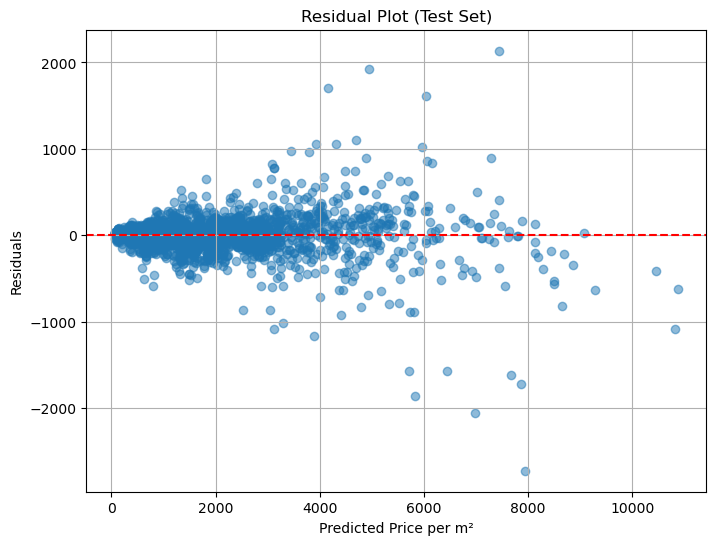

In [13]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price per m²")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")
plt.grid(True)
plt.show()

In [12]:
import joblib
joblib.dump(stacked_model, "../../../models/ensemble/stacked_model_v2.joblib")

['../../../models/ensemble/stacked_model_v2.joblib']